In [15]:
################################
# Solves - u'' + u = f         #
# With zero Dirichlet boundary #
################################
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'

# Problem Parameters
a = 0.
b = 1.


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)

In [16]:
# Parameters
d = 1
k = 2
delta = 0.25
N = 50

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N, flat=True)

# Integration
integrator = rad.integrate.QuadIntegrator(ranges)
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Solve for approximate solution
phi = rad.Wendland(d, k, delta, xc)
solver = rad.solve.GalerkinSolver(phi, integrator, 'helmholtz')
approx = solver.solve(f)
error = rad.error(exact, approx, error_integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())
print("Bandwidth:", solver.bandwidth())

L2 Relative Error: 0.05195227182527128
Condition Number: 104010269.41327077
Bandwidth: (24, 22)


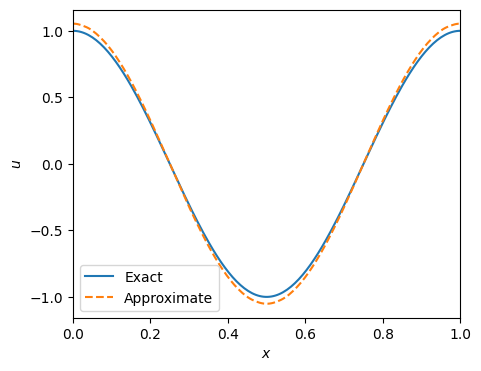

In [17]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.margins(x=0.)

x = rad.gridn(ranges, 200)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
ax.plot(*x, exact(*x), label="Exact")
ax.plot(*x, approx(*x), '--', label="Approximate")
ax.legend()

plt.show()